In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table
from   scipy.optimize    import brentq, minimize, brute, brent

In [3]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [5]:
from gen_zmax_cat import solve_theta, theta
from   cosmo      import distmod

In [6]:
zmax = Table.read('/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_zmax.fits')
zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
302523,587726032230285729,138.24107544,1.3898106,19.310106,0.16764,4,G09_Y1_GN2_387,6,20.884176,19.892538,19.333622,19.098059,19.157925,0.16764,567.5885680799823,38.77016819828783,G9,0,0,-362.5006147831849,323.6456274072515,11.790034707245052,360.24777609950615,-326.16542001143983,11.395234992742399,0.5589161,19.310106,0.44947958943753863,0,3,-0.09190520741951015,0.01753129506189649,0.09878359656519924,0.22966952698049942,0.42803016150364515,2.12,-0.1626108,-0.35539678,-19.396234718313032,-19.20344873999577,-19.558845517387205,38.70634099577885,38.868951794853025,38.51355501746159,-0.061355101375443914,0.057927197356676036,0.1553697769867572,0.3231024870703393,-19.45282089873459,0.48989296,0.2133479311066213,0.0,-7.3101063,0.005788281112758979,0.0,4203371.594730427
69566,587722983348699216,175.44771129,0.10148011,18.58092,0.03966,4,G12_Y1_AN1_013,6,19.88805,18.912779,18.466942,18.23064,18.007154,0.03966,122.68342871487285,35.443929524975005,G12,0,0,-117.63096796700349,9.365781887576258,0.20900306222365378,117.56296059674986,-10.185776712557828,0.08016226562728043,0.44583702,18.58092,0.4879333442945132,0,3,-0.14648300185863028,-0.18857932527911986,0.05072731166270636,0.036843615892893145,0.4597207166438366,2.12,-0.0384702,-0.08407919,-16.875267369696353,-16.829658379801963,-16.91373757089064,35.45618663544342,35.49465683663771,35.41057764554903,-0.16153302305915562,-0.2141912621449974,0.05519185530304549,0.05098402756866588,-16.879731913336695,1.21908,0.06917900693999858,0.0,-6.5809193,0.0019437837332501502,0.0,156653.3082278379
78125,587722983366328655,215.75383617,0.13023629,19.602116,0.2377,4,G15_Y5_003_146,5,20.624166,19.927563,19.651224,19.482803,19.34569,0.2377,840.4516702177666,39.62256372295707,G15,0,0,-551.0657481877765,-396.766592666884,1.5434990568922213,553.8203024130299,392.91445096729393,0.9365510086970453,0.27633858,19.602116,0.059632267516942464,0,1,-0.2190692266760338,-0.0023629169224729935,-0.05778850736965971,0.12548169456615177,0.09306837533469633,2.12,-0.230569,-0.50392395,-19.73209057947138,-19.458735631904393,-19.96265958448389,39.3342062105749,39.56477521558741,39.06085126300791,-0.02611788668493953,0.250571435116781,0.19060699167726158,0.5157467248304443,-19.9804860785183,0.1978836,0.26557336204152554,0.0,-7.6021156,0.006499216208630515,0.0,7836894.982863354
92683,587722983903854830,217.20616405,0.62545319,17.007326,0.05125,5,344631501830252544,6,18.388035,17.37754,17.003227,16.775734,16.613625,0.05125,159.94313623875726,36.01982803805585,G15,0,0,-121.17146380955684,-91.99469525940498,1.660822274210822,121.81172981152636,91.14754897357581,1.5273259905315857,0.37431335,17.007326,0.4088576076707692,0,3,-0.12670920169668512,-0.1612534548751771,0.057562876439351374,0.03841825975780236,0.3934579711737365,2.12,-0.0497125,-0.10864999,-19.02035228

In [7]:
failure = zmax[zmax['ZMAX_WARN'] > 0]
failure

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--


In [8]:
rest_gmr_0p0 = failure['REST_GMR_0P0'][0]
rest_gmr_0p1 = failure['REST_GMR_0P1'][0]

In [9]:
rest_gmr_0p0, rest_gmr_0p1

(0.16493309359928562, 0.13170774822191056)

In [10]:
thetaz       = failure['Z_THETA_QCOLOR'][0]

In [11]:
rlim         = 19.8
dr           = rlim - failure['DETMAG'][0]

In [12]:
dr

2.2130458831787116

In [13]:
z            = failure['ZSURV']

In [19]:
zs           = np.arange(0.0, 8.0, 1.e-1)
ts           = theta(zs, rest_gmr_0p1, rest_gmr_0p0)

mus          = distmod(zs)

Text(0, 0.5, '$\\mu(z)$')

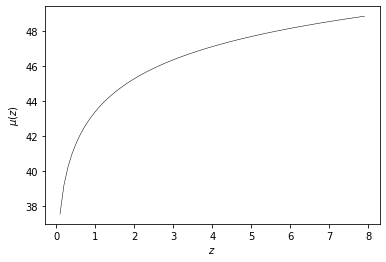

In [20]:
pl.plot(zs, mus, c='k', lw=0.5)

pl.xlabel('$z$')
pl.ylabel(r'$\mu(z)$')

Text(0, 0.5, '$\\theta(z)$')

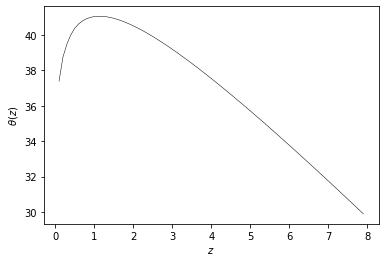

In [21]:
pl.plot(zs, ts, c='k', lw=0.5)

pl.xlabel('$z$')
pl.ylabel(r'$\theta(z)$')

In [38]:
ts = theta(zs, rest_gmr_0p1, rest_gmr_0p0, thetaz=thetaz, dr=dr, absolute=False)

Text(0, 0.5, '$\\Delta \\theta(z)$')

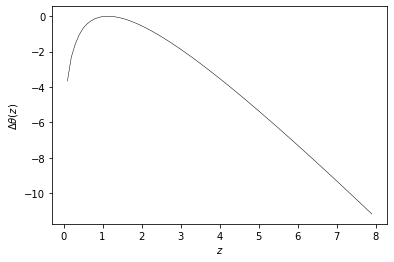

In [39]:
pl.plot(zs, ts, c='k', lw=0.5)

pl.xlabel('$z$')
pl.ylabel(r'$\Delta \theta(z)$')

In [40]:
solve_theta(rest_gmr_0p1, rest_gmr_0p0, thetaz, dr)

(1.1688232421875, 0)

In [53]:
brent(theta, brack=(1.e-6, 1.6), args=(rest_gmr_0p1, rest_gmr_0p0, thetaz, dr, False, True))

1.168793114866426

In [54]:
brent(theta, brack=(1.e-6, 1.6), maxiter=1000, args=(rest_gmr_0p1, rest_gmr_0p0, thetaz, dr, False, True))

1.168793114866426

In [55]:
minimize(theta, 2.5, args=(rest_gmr_0p1, rest_gmr_0p0, thetaz, dr, False, True), method = 'Nelder-Mead')

 final_simplex: (array([[1.16882324],
       [1.16876221]]), array([2.03403093e-06, 2.08532768e-06]))
           fun: 2.0340309312416593e-06
       message: 'Optimization terminated successfully.'
          nfev: 37
           nit: 18
        status: 0
       success: True
             x: array([1.16882324])

# Done.